\section{Free spinless fermions}
Spinless free fermions on a lattice can be written as
\begin{equation}
  H_{0}=-t\sum_{\langle{ij}\rangle}(c_{i}^{\dagger}c_{j}+h.c.),
 \label{<+label+>}
\end{equation}
where $\{c_{i}^{\dagger}, c_{j}\}=\delta_{i,j}$. In the first place, let us consider the simplest lattice, namely a one dimensional bipartite ring with $L$ (even) sites. With periodic boundary condition (PBC), by a discrete Fourier transformation
\begin{equation}
 c_{j}=\frac{1}{\sqrt{L}}\sum_{k}e^{\text{i}kj}c_{k},
\label{}
\end{equation}
with the quantization condition imposed by the boundary condition. Then the Hamiltonian becomes

\begin{equation}
H_{0}=-t\sum_{k}(2\cos{k})c_{k}^{\dagger}c_{k}.
\label{}
\end{equation}
suppose there are $N, (N \leq L)$ fermions in the system.

\subsection{Ground state}

The ground state is simply the one in which the lowest $N$ orbitals are occupied. Different boundary conditions also impose different quantization conditions of $k$, for examples,
\begin{itemize}
\item \textbf{Periodic boundary condition} (PBC). $kL=2n\pi, n\in{Z}$. If $N$ is even, there is a \textbf{two-fold ground state degeneracy}. Otherwise not.
\item \textbf{Anti-periodic boundary condition} (APBC). $kL=(2n+1)\pi, n\in{Z}$. If $N$ is odd, there is a two-fold ground state degeneracy. Otherwise not.
\end{itemize}

For two pieces of free fermions $\sigma=\uparrow, \downarrow$, they have no interactions and can be treated separately as $H_{0}=-t\sum_{k}(2\cos{k})c_{k}^{\dagger}c_{k}-t\sum_{k{'}}(2\cos{k{'}})c_{k{'}}^{\dagger}c_{k{'}}$. On a bipartite lattice with PBC, we can expect a four-fold degeneracy at most in terms of the spin-$1/2$ free fermion model.


In [106]:
import numpy as np

L = 10
numFermion = 5
numFermionAnother = 5

gsE = 0.0
for i in range(-int(numFermion / 2), int((numFermion+1) / 2), 1):
    k = 2*np.pi*i / L
    # print(i)
    gsE += -2*np.cos(k)
    
for i in range(-int(numFermionAnother / 2), int((numFermionAnother+1) / 2), 1):
    k = 2*np.pi*i / L
    # print(i)
    gsE += -2*np.cos(k)

print('Ground state energy of free electrons:', gsE)


Ground state energy of free electrons: -12.94427190999916


In [107]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special

U = 0.0

def Energy(x):
    return -4*L*(special.jv(0, x)*special.jv(1, x)) / (x*(1.0+np.exp(x*0.5*U)))

integrate.quad(lambda x: Energy(x), 0, 1000)

/Users/wayne/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  # Remove the CWD from sys.path while we load stuff.


(-12.732361117393589, 0.017693385239684126)

\section{Electron interaction}

When the simplest on-site interaction is turned on such as
\begin{equation}\label{eq:}
H_{1} = U\sum_{i}n_{i\uparrow}n_{i\downarrow}
\end{equation}
we have the Hamiltonian of Hubbard model $H=H_{0}+H_{1}$. The two pieces get involved. It is quite interesting and general to ask how will the interaction affects on the properties of free fermions. In 1D, the theory of Luttinger liquid has been extensively studied.

\subsection{Lieb-Wu solution}

The exact solution for 1D half-filed Hubbard model is
\begin{equation}
E_{0}(N/2, N/2)=-4N\int_{0}^{\infty}\frac{J_{0}(\omega)J_{1}(\omega)}{\omega\left(1+e^{\omega U/2}\right)}d\omega
\end{equation}
where $J_{0, 1}$ are the Bessel function of first and second order. Note that it is only valid in the thermodynamic limit as $L \rightarrow \infty$. What's the true nature of ground states with consideration of finite lattice is still unclear.

\subsection{Lieb's theorem on Hubbard model}

For the hall filled Hubbard model, in the limit $U \rightarrow \infty$ Hubbard model is reduced to Heisenberg model. Even for finite $U$, Lieb has proven powerful theorems to state that the ground state property is quite similar to the Heisenberg model. **There is no ground state degeneracy for repulsive half-filled Hubbard model**. That is, even any finite small $U$ can dramatically change the the property of free fermions because we can always expect at most four-fold ground state degeneracy for free fermions on a bipartite lattice. Lieb's theorems tell us that any finite $U$ will destroy the thus ground state degeneracy.

It is quite natural to ask how about the scenario away hall-filling. Nothing like Lieb's theorems tell us the story.

In [40]:
import numpy as np

def LoadEigVal(f):
    rawData = np.fromfile(f, dtype=np.float)
    eigVal = np.reshape(rawData, (numSam, numEval))
    return eigVal

# The returned eigVec[i][j] gives the ith sample's jth eigvector with dimesion dim.
def LoadEigVec(f):
    rawData = np.fromfile(f, dtype=np.float)
    temp = np.reshape(rawData, (numSam, numEval, dim, 2))
    eigVec = np.array(temp[..., 0], dtype=complex)
    eigVec.imag = temp[..., 1]
    # print(eigVec)
    return eigVec

eigValsFile = 'eigenvalues10_lattice0801_filling0404_U00_step05_num100_PO.dat'

numEval = 10
numSam = 100

basis = np.genfromtxt('hilbert_space.txt', delimiter=',', dtype=np.int64)
dim = basis.size-1

spec = LoadEigVal(eigValsFile)
print(spec.shape)
print(spec[: ,0])

(100, 10)
[-9.65685425 -8.76251851 -7.9523256  -7.22239321 -6.56819216 -5.98471993
 -5.46660145 -5.00816018 -4.6035263  -4.24680437 -3.9322714  -3.65455724
 -3.40877213 -3.19057107 -2.99616349 -2.82228492 -2.66614742 -2.5253813
 -2.39797651 -2.28222814 -2.17668812 -2.08012364 -1.99148196 -1.90986107
 -1.83448522 -1.76468473 -1.69987926 -1.63956395 -1.58329801 -1.53069512
 -1.48141552 -1.43515937 -1.3916612  -1.35068519 -1.31202126 -1.27548167
 -1.24089819 -1.2081197  -1.17701003 -1.14744624 -1.11931704 -1.09252147
 -1.06696774 -1.0425722  -1.01925849 -0.99695679 -0.97560308 -0.9551386
 -0.93550932 -0.91666546 -0.89856111 -0.88115382 -0.86440435 -0.84827629
 -0.83273587 -0.81775173 -0.80329467 -0.78933749 -0.77585482 -0.76282298
 -0.75021982 -0.73802463 -0.72621799 -0.7147817  -0.70369866 -0.69295281
 -0.68252907 -0.67241319 -0.6625918  -0.65305226 -0.64378264 -0.63477168
 -0.62600875 -0.61748376 -0.60918719 -0.60110999 -0.59324361 -0.58557992
 -0.57811121 -0.57083015 -0.56372976 -0.556

<IPython.core.display.Javascript object>


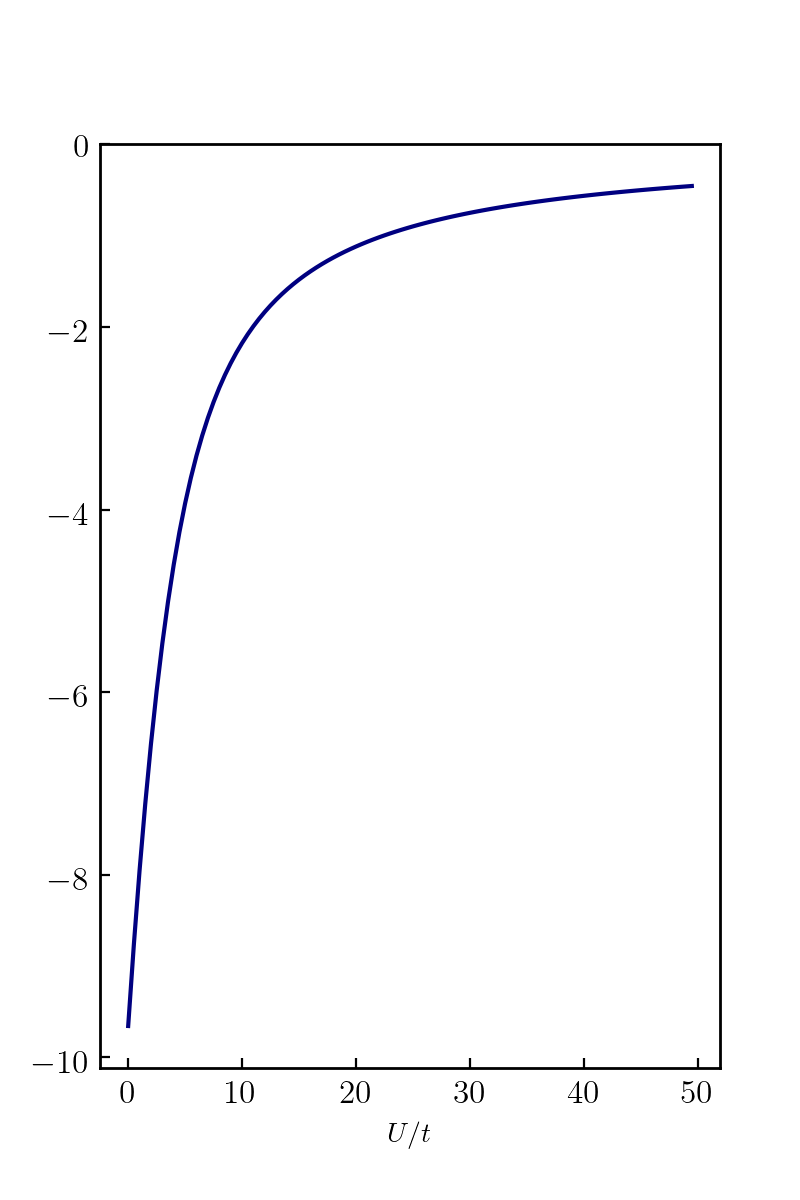

In [48]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import matplotlib.patches as patches

%matplotlib notebook

fig = plt.figure(figsize=(4, 6))
mpl.rcParams['axes.linewidth'] = 1.0
fsize = 12
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

ax = fig.add_subplot(111)
x = np.linspace(0, 50, num=100, endpoint=False)
y = spec[:, 0]
ax.plot(x, y, color='navy')

ax.tick_params(axis='both', labelsize=fsize, direction='in')
ax.set_xlabel('$U/t$')

fig.savefig('gs_energy.pdf', format='PDF')

\section{Entanglement}

It is quite natural to consider the entanglement of the two branches of fermions in Lieb's representation:
\begin{equation}
    |\psi\rangle=\sum_{ij}w_{ij}|i\rangle_{\uparrow}|j\rangle_{\downarrow}.
\end{equation}
